**El objetivo de basarse en el libro es puramente por aprender**

## 1. **Business Cycle**



In [1]:
#importamos las librerías necesarias
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
start=datetime(1948,3,1)
import seaborn
seaborn.reset_orig()

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


### **1.1 Indicadores de Coincidentes**

El gráfico a continuación muestra los ciclos económicos de EE.UU desde 1948. Donde el tiempo transcurrido entre el peak de los indicadores y el fondo de ellos son considerados tiempos de contracción económica. Vemos en el gráfico que no todos los ciclos económicos tienen la misma duración. 

No tiene una naturaleza predictiva, pero es una muy buena medida descriptiva para mostrar en que parte del ciclo económico está EE.UU.  ya que entrega información sobre: empleo, ingresos, producción, y ventas.

- **INDPRO**: Industrial Production
- **CMRMTSPL**: Real Manufacturing and Trade Industries Sales
- **AWHMAN**: Average Weekly Hours of Production and Nonsupervisory Employees: Manufacturing
- **PAYEMS**: All Employees: Total Nonfarm Payrolls

In [0]:
#importamos los datos
NBER_recession_indicator = web.get_data_fred(["INDPRO", "CMRMTSPL", "AWHMAN", "PAYEMS"], start).dropna()
NBER_recession_indicator = NBER_recession_indicator.pct_change(12).dropna()
NBER_recession_indicator.index = pd.to_datetime(NBER_recession_indicator.index)

In [3]:
NBER_recession_indicator.reset_index(level=0, inplace=True) #Sacamos del índice las fechas para utilizarlas en marcar las crisis financieras.
NBER_recession_indicator.head(3)

,DATE,INDPRO,CMRMTSPL,AWHMAN,PAYEMS
0,1968-01-01,0.030928,0.052543,-0.017032,0.021359
1,1968-02-01,0.046495,0.053269,0.009901,0.027297
2,1968-03-01,0.055710,0.053477,0.007407,0.026934


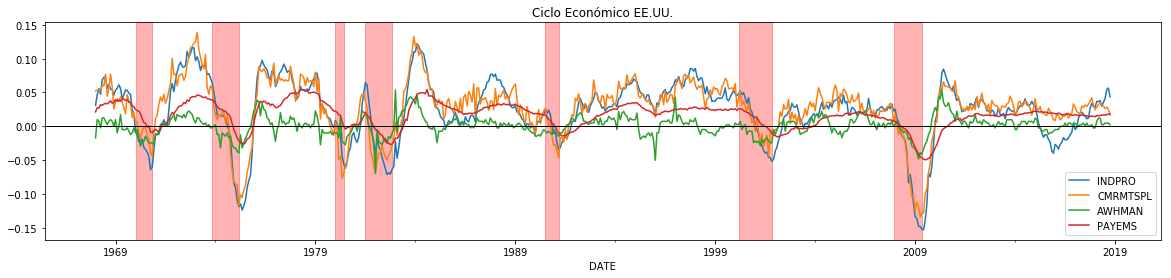

In [4]:
#los graficamos con rebase
NBER_recession_indicator.plot(x="DATE", figsize=(20,4))
plt.title("Ciclo Económico EE.UU.")
plt.axhline(y=0, c="black", lw=1)
plt.axvspan("1970-1-1", "1970-11-1", alpha=0.3, color='red') #EE.UU. stagflación
plt.axvspan("1973-11-1", "1975-3-1", alpha=0.3, color='red') #Crisis del Petroleo
plt.axvspan("1980-1-1", "1980-6-1", alpha=0.3, color='red')  #Recesión Global
plt.axvspan("1981-7-1", "1982-11-1", alpha=0.3, color='red') #Aumento de Tasas de Interés
plt.axvspan("1990-7-1", "1991-3-1", alpha=0.3, color='red')  #S&L
plt.axvspan("2000-3-1", "2001-11-1", alpha=0.3, color='red') #Dotcom
plt.axvspan("2007-12-1", "2009-5-1", alpha=0.3, color='red') #Subprime (aproximación fechas basados en FRED)

###**1.2 Chicago Fed National Activity Index**

Nos entrega información valiosa sobre el estado de la actividad económica de EE.UU. El índice incorpora información sobre 85 índices distintos y los pondera en uno. Lo que está al interior de este es información sobre 4 grandes temas: 1) ingreso y producción 2) consumo personal y mercado inmobiliario; 3) ventas, ordenes e inventarios 4) empleo, desempleo y horas trabajadas.

Este indicador tiene una variante particularmente fuerte. Este es el promedio móvil de 3 meses. Que logra entregar información sobre futuras recesiones al mismo tiempo que permite determinar si es que se está en una recesión.

Este indicador tiene una lectura de cero, es decir, sobre él la actividad crece por sobre su tendencia, bajo él la actividad está por debajo de su tendencia. El límite desde el cual se considera recesión es cuando se cae bajo -0.7. Por el contrario, sobrepasar 0.7 por más de dos años significa estar en terreno de inflación.

In [5]:
#importamos los datos
national_US_activity = web.get_data_fred(["CFNAI", "CFNAIMA3"], start).dropna()
national_US_activity = national_US_activity.dropna()
national_US_activity.index = pd.to_datetime(national_US_activity.index)
national_US_activity.reset_index(level=0, inplace=True) #Sacamos del índice las fechas para utilizarlas en marcar las crisis financieras.
national_US_activity.head(1)

,DATE,CFNAI,CFNAIMA3
0,1967-05-01,-0.68,-0.44


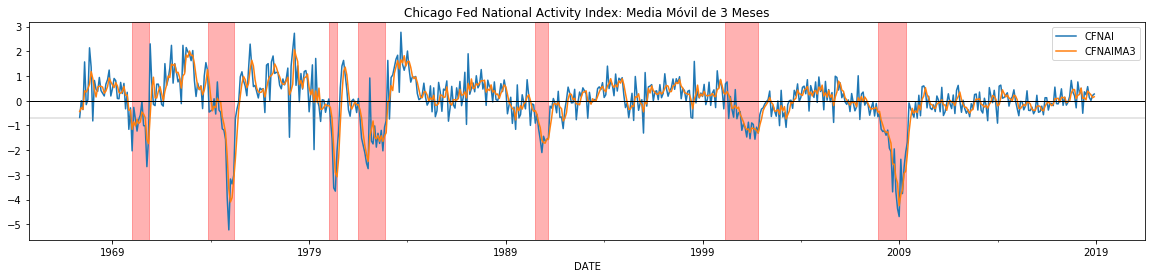

In [7]:
national_US_activity.plot(x = "DATE", figsize=(20,4))
plt.title("Chicago Fed National Activity Index: Media Móvil de 3 Meses")
plt.axhline(y=0, c="black", lw=1)
plt.axhline(y=-0.7, c="grey", lw=0.4) #recesión
plt.axvspan("1970-1-1", "1970-11-1", alpha=0.3, color='red') #EE.UU. stagflación
plt.axvspan("1973-11-1", "1975-3-1", alpha=0.3, color='red') #Crisis del Petroleo
plt.axvspan("1980-1-1", "1980-6-1", alpha=0.3, color='red')  #Recesión Global
plt.axvspan("1981-7-1", "1982-11-1", alpha=0.3, color='red') #Aumento de Tasas de Interés
plt.axvspan("1990-7-1", "1991-3-1", alpha=0.3, color='red')  #S&L
plt.axvspan("2000-3-1", "2001-11-1", alpha=0.3, color='red') #Dotcom
plt.axvspan("2007-12-1", "2009-5-1", alpha=0.3, color='red') #Subprime (aproximación fechas basados en FRED)

###**1.3 Diffusion Index**

De la misma familia de Chicago, se trata de una variante con interesantes comportamientos:

Este indicador es muy útil para saber sobre futuros aumentos en "turbulencia" financiera. Cuando se cae por debajo de -0.35 es señal de futura alta tensión en los mercados financieros en el corto plazo (fijarse en primera linea horizontal gris e interseción de franjas rojas. Cuando el índice cae por debajo de tal límite, por lo general se está en crisis o se está en frente de una. Sólo ha entregado una señal falsa desde 1971. Para aprender más sobre este índice haz click [aquí](https://www.investopedia.com/terms/d/diffusionindex.asp).

In [0]:
#importamos los datos
Diffusion_Index = web.get_data_fred(["CFNAIDIFF"], start).dropna()
Diffusion_Index = Diffusion_Index.dropna()
Diffusion_Index.index = pd.to_datetime(Diffusion_Index.index)
Diffusion_Index.reset_index(level=0, inplace=True) #Sacamos del índice las fechas para utilizarlas en marcar las crisis financieras.
Diffusion_Index.head(1)

,DATE,CFNAIDIFF
0,1967-05-01,-0.21


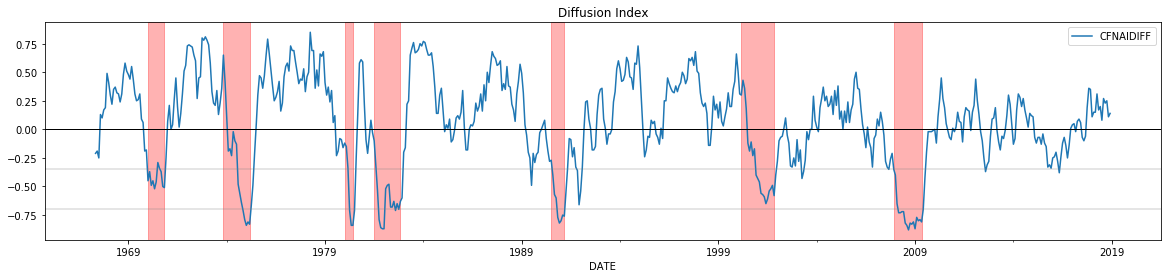

In [0]:
Diffusion_Index.plot(x = "DATE", figsize=(20,4))
plt.title("Diffusion Index")
plt.axhline(y=0, c="black", lw=1)
plt.axhline(y=-0.35, c="grey", lw=0.4) #vienen tiempos malos
plt.axhline(y=-0.7, c="grey", lw=0.4) #recesión
plt.axvspan("1970-1-1", "1970-11-1", alpha=0.3, color='red') #EE.UU. stagflación
plt.axvspan("1973-11-1", "1975-3-1", alpha=0.3, color='red') #Crisis del petroleo
plt.axvspan("1980-1-1", "1980-6-1", alpha=0.3, color='red')  #Recesión Global
plt.axvspan("1981-7-1", "1982-11-1", alpha=0.3, color='red') #Aumento de Tasas de Interés para combatir inflación
plt.axvspan("1990-7-1", "1991-3-1", alpha=0.3, color='red')  #S&L
plt.axvspan("2000-3-1", "2001-11-1", alpha=0.3, color='red') #Dotcom
plt.axvspan("2007-12-1", "2009-5-1", alpha=0.3, color='red') #Subprime (aproximación fechas basados en FRED)

**Este primer capítulo tambien menciona la curva de rendimientos, ya trabajada en el repositorio "Fixed Income". Por tales motivos no será tratado en este documento.**

**Otros indicadores muy útiles son GDPnow y GDPplus, no los pude obtener. Invito al lector a enterarse de que tratan. Una pista, es una medida de "más alta" frecuencia que las típicas estimaciones de GDP.**